<a href="https://colab.research.google.com/github/msayeshasiddikatonny/CSE330_python_Labs/blob/main/Assignment_4_description_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 330 Numerical Analysis Lab 

### Lab 4

### Instructions
---


In this week we will learn a little about numpy polynomial module (`numpy.polynomial`). After that we will do two assignment using this Polynomial class. 

Todays assignments are:
1. Implement Hermite Interpolation using Python
2. Implement forward, backward and central differentiaton using python and finding error.

But before we start let’s take a look at numpy polynomial module.

### `numpy.polynomial`
---

In mathematics polynomials are of form,

$$f(x)=a_0+a_1 x+a_2 x^2 + a_3 x^3 + ⋯ + a_n x^n \tag{4.1}$$

Numpy provide a class named Ploynmial in it’s numpy.polynomial module. We can initialize a polynomial by passing the coefficients as an array.

In [1]:
import numpy as np
from numpy.polynomial import Polynomial

p1 = Polynomial([1,2,3])    # 1 + 2x + 3x^2
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

Here the variable p1 represents the following equation,

$$x \mapsto \text{1.0} + \text{2.0}\,x + \text{3.0}\,x^{2}$$

We can also use a numpy array to initialize the polynomial. For example,

In [2]:
coeff = np.array([-5,0,2,1])
p2 = Polynomial(coeff)
p2

Polynomial([-5.,  0.,  2.,  1.], domain=[-1,  1], window=[-1,  1])

Here p2 represents the following equation,

$$x \mapsto \text{-5.0}\color{LightGray}{ + \text{0.0}\,x} + \text{2.0}\,x^{2} + \text{1.0}\,x^{3}$$

We can also call the polynomial as a function of x, i.e. $p1(x)$. For example,

In [3]:
print("p1(0.0) = ", p1(0.0))
print("p1(1.0) = ", p1(1.0))
print("p1(2.0) = ", p1(2.0))

p1(0.0) =  1.0
p1(1.0) =  6.0
p1(2.0) =  17.0


We can also pass variables in the polynomial function,


In [4]:
x = 3
y = p1(x)
print("p1(x) = ", y)

p1(x) =  34.0


Althogh, you might sometimes need to calculate the $Y$-values for a lot of different $X$-values at a time. Howver, passing an array with give you an error.

In [6]:
x = [1,2,3]
y = p1(x)
print(y)

TypeError: ignored

Numpy array can come to your rescue in this case,

In [7]:
x = np.array([1,2,3])
y = p1(x)
print(y)

[ 6. 17. 34.]


You can also run arithmatic operations on the polynomials. for example,

\begin{align}
y = p1(x) &= 9 + 2 x - 2.5 \times x^3 \\
y = p2(x) &= 6 + 3.5 \times x + 1.9 \times x^2 \\
y = p1(x) + p2(x) &= 15 + 5.5 \times x + 1.9 \times x^2 - 2.5 \times x^3
\end{align}

In [ ]:
p1 = Polynomial([9.0, 2.0, 0.0, -2.5])
p2 = Polynomial([6.0, 3.5, 1.9])

p3 = p1+p2
p3

Polynomial([15. ,  5.5,  1.9, -2.5], domain=[-1.,  1.], window=[-1.,  1.])

Here $p3$ represents the following equation,
$$x \mapsto \text{15.0} + \text{5.5}\,x + \text{1.9}\,x^{2} - \text{2.5}\,x^{3}$$

Similarly you can multiply polynomials too. For example,
\begin{align}
g(x) &= -1 + x \\
h(x) &= 6 + 5\times x+x^2 \\
g(x)\times h(x) &= -6 + x + 4 x^2 + x^3
\end{align}

In [ ]:
g = Polynomial([-1, 1])
h = Polynomial([6, 5, 1])

p = g*h
display(p)

Polynomial([-6.,  1.,  4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

Here $p$ represents the following polynomial,
$x \mapsto \text{-6.0} + \text{1.0}\,x + \text{4.0}\,x^{2} + \text{1.0}\,x^{3}$

You can also find roots for a polynomial.

In [ ]:
f = Polynomial([6, -5, 1]) # 6 - 5x + x^2
f.roots()

array([2., 3.])

To find the derivative of a function you can use deriv function.

In [ ]:
f = Polynomial([6, -5, 1]) # 6 - 5x + x^2

df = f.deriv(1) # -5 + 2x
display(df)

ddf = f.deriv(2) # 2
display(ddf)

Polynomial([-5.,  2.], domain=[-1.,  1.], window=[-1.,  1.])

Polynomial([2.], domain=[-1.,  1.], window=[-1.,  1.])

Here, $df$ represensts the polynomial, $x \mapsto \text{-5.0} + \text{2.0}\,x$, and $ddf$ represenst the polynomial, $x \mapsto \text{2.0}$

Let's move on to todays assignment.

## Assignment 1: Hermite Interpolation
---
If you recall your class lecture you might remember *Hermite interpolation*. If you have $n+1$ data points, $(x_0, y_0), (x_1, y_1), x_2, y_2), ... (x_n, y_n)$ and you happen to know the first-order ferivative at all of these points, namely, $(x_0, y_0 ^\prime ), (x_1, y_1 ^\prime ), x_2, y_2 ^\prime ), ... (x_n, y_n ^\prime )$, Accorrding to hermit interpolation you can fit a polynomial of order $2n-1$.

$$p_{2n+1} = \sum_{k=0}^{n}{f(x_K)h_k(x)+f^\prime (x_k)\hat{h_k}(x)}\tag{4.2}$$
where $h_k$ and $\hat{h_k}$ are defined by Lagrange basis functions,
$$h_k(x) = (1-2(x-x_k)l^\prime_k(x_k))l^2_k(x_k) \tag{4.3}$$
and,
$$\hat{h_k}(x) = (x-x_k)l^2_k(x_k) \tag{4.4}$$

For this assignment you will be provided with the following skeleton code.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from numpy.polynomial import Polynomial

def l(k, x):
    n = len(x)
    assert (k < len(x))
    
    x_k = x[k]
    x_copy = np.delete(x, k)
    
    denominator = np.prod(x_copy - x_k)
    
    coeff = []
    
    for i in range(n):
        coeff.append(sum([np.prod(x) for x in combinations(x_copy, i)]) * (-1)**(i) / denominator)
    
    coeff.reverse()
    
    return Polynomial(coeff)

def h(k, x):
    l_k = None
    l_k_sqr = None
    l_k_prime = None
    coeff = None
    p = None
    
    return p * l_k_sqr

def h_hat(k, x):
    l_k = None
    l_k_sqr = None
    coeff = None
    p = None
    
    return p * l_order_sqr

def hermit(x, y, y_prime):
    assert( len(x) == len(y))
    assert( len(y) == len(y_prime))
    
    f = Polynomial([0.0])
    for i in range(len(x)):
        # f += ?
        pass
    return f

Here, method `l`, `h` and `h_hat` calculates the corresponding $l_k$, $h_k$ and $\hat{h_k}$.

Note that, we can rewrite equation 4.3 in this way,
\begin{align}
h_k(x) &= (1-2(x-x_k)l^\prime_k(x_k))l^2_k(x_k) \\
&= (1 - 2xl^\prime_k(x_k) + 2x_kl^\prime_k(x_k))l^2_k(x_k)
\end{align}
Replacing, $l^\prime_k(x_k)$ with $m$ we get,
$$h_k(x) = (1 - 2xm + 2x_km)l^2_k(x_k) \tag{4.5}$$

Equation 4.5 is basically becomes a multiplication of two polynomials.

### Task

method `l` has already been defined for you. Your task is to complete the `h`, `h_hat` and `hermit` method.

Later we will draw some plots to check if the code is working.

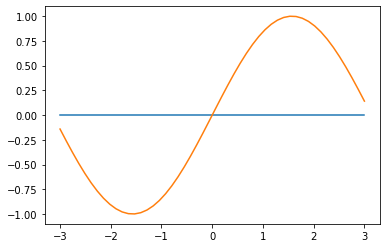

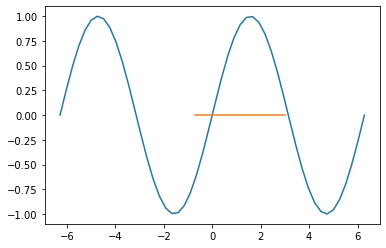

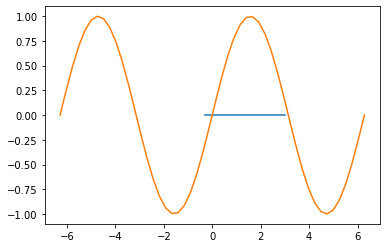

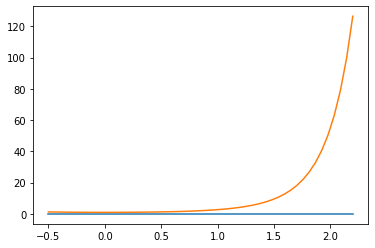

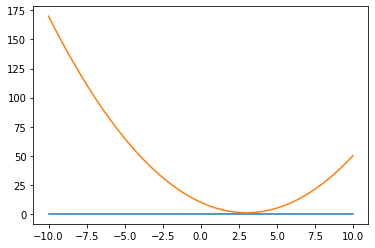

In [9]:
pi = np.pi

x       = np.array([0.0, pi/2.0,  pi, 3.0*pi/2.0])
y       = np.array([0.0,    1.0, 0.0,       -1.0])
y_prime = np.array([1.0,    0.0, 1.0,        0.0])


n = 1
f3     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f3.linspace(n=50, domain=[-3, 3])
test_x = np.linspace(-3, 3, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()

n = 2
f5     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f5.linspace(n=50, domain=[-0.7, 3])
test_x = np.linspace(-2*pi, 2*pi, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(test_x, test_y)
plt.plot(data[0], data[1])
plt.show()

n = 3
f7     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f7.linspace(n=50, domain=[-0.3, 3])
test_x = np.linspace(-2*pi, 2*pi, 50, endpoint=True)
test_y = np.sin(test_x)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()


x       = np.array([0.0, 1.0,          2.0       ])
y       = np.array([1.0, 2.71828183,  54.59815003])
y_prime = np.array([0.0, 5.43656366, 218.39260013])
f7      = hermit( x, y, y_prime)
data    = f7.linspace(n=50, domain=[-0.5, 2.2])
test_x  = np.linspace(-0.5, 2.2, 50, endpoint=True)
test_y  = np.exp(test_x**2)

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()

x       = np.array([1.0, 3.0, 5.0])
y       = np.array([5.0, 1.0, 5.0])
y_prime = np.array([-4.0, 0.0, 4.0])
f7      = hermit( x, y, y_prime)
data    = f7.linspace(n=50, domain=[-10, 10])
test_x  = np.linspace(-10, 10, 50, endpoint=True)
test_y  = (test_x-3)**2 + 1

plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()

## Assignment 2: Differentiation

We have already learnt about *forward differentiation*, *backward diferentiation* and *central differentiation*. In this part of the assignment we will write methods to calculate this values and check how they perform.

The equations are as follows,

\begin{align}
\text{forward differentiation}, f^\prime(x) = \frac{f(x+h)-f(x)}{h} \tag{4.6} \\
\text{backward differentiation}, f^\prime(x) = \frac{f(x)-f(x-h)}{h} \tag{4.7} \\
\text{central differentiation}, f^\prime(x) = \frac{f(x+h)-f(x-h)}{2h} \tag{4.8}
\end{align}

you will be provided with a skeleton code.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

def forward_diff(f, h, x):
    x =(f(x+h)-f(x))/h
    return x

def backward_diff(f, h, x):
    x=(f(x)-f(x-h))/h
    return x

def central_diff(f, h, x):
    x=(f(x+h) -f(x-h))/(2*h)
    return x

def error(f, f_prime, h, x):
    Y_correct = f_prime(x)
    f_error = np.array([])
    b_error = np.array([])
    c_error = np.array([])
    
    for h_i in h:
        f_error=(Y_correct-forward_diff(f,h,x))
        b_error=(Y_correct-backward_diff(f,h,x))
        c_error=(Y_correct-central_diff(f,h,x))
        
        pass
    
    return f_error, b_error, c_error

Here, `forward_diff`, `backward_diff` and `central_diff` calculates the *forward differentiation*, *backward differentiation* and *central differentiation* respectively. finally the `error` method calculates the different values for various $h$ and returns the errors.

Later we will run some code to test out performance,

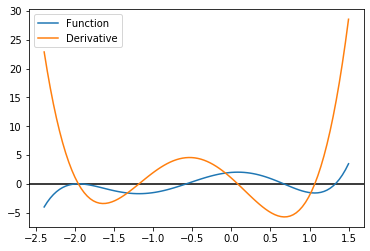

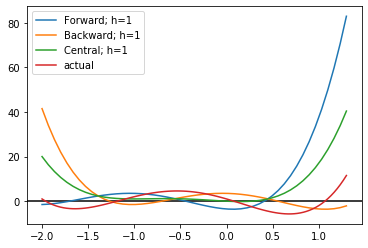

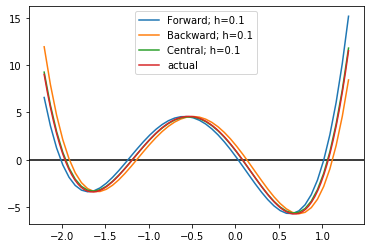

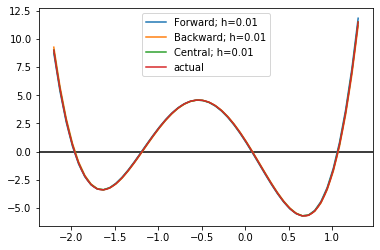

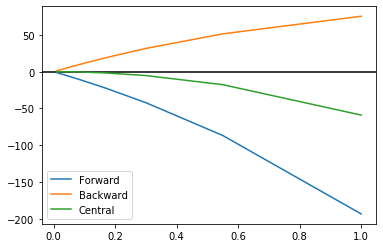

In [ ]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
data = p.linspace(domain=[-2.4, 1.5])
ax.plot(data[0], data[1], label='Function')

p_prime = p.deriv(1)
data2 = p_prime.linspace(domain=[-2.4, 1.5])
ax.plot(data2[0], data2[1], label='Derivative')

ax.legend()

##################################

h = 1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.0, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=1')

data2 = p_prime.linspace(domain=[-2.0, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

##################################

h = 0.1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.1')

data2 = p_prime.linspace(domain=[-2.2, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

##################################

h = 0.01
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.01')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.01')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.01')

data2 = p_prime.linspace(domain=[-2.2, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

##################################

fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

h = np.array([1., 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
err = error(p, p_prime, h, 2.0)

bx.plot(h, err[0], label='Forward')
bx.plot(h, err[1], label='Backward')
bx.plot(h, err[2], label='Central')
bx.legend()